# Notebook used for a quick check of extracted muscle signals

Going to compare the data obtained from my method vs Thad's (mine is very similar to Thad's, but can ideally be extended such that we avoid using a GUI interface for alignment)

In [43]:
import os
import h5py
import cPickle

import numpy as np
import matplotlib.pyplot as plt

## Load data

In [44]:
# NB: to make things easy, flies 18 and 19 originate from the same data, but 18 is "my" method and 19 is Thad's
root_path = '/media/sam/SamData/FlyDB'
my_folder = 'Fly0054'  # 'Fly0025/code_results/attempt_01' # 'Fly0024/code_results'
thad_folder = 'Fly0054/backup/viewer_analysis'  #  'Fly0025/gui_results' # 'Fly0024/gui_results/attempt_02_original_gui'

my_path = os.path.join(root_path, my_folder)
thad_path = os.path.join(root_path, thad_folder)

In [45]:
# # load my dict containing the different data types
# my_path = os.path.join(root_path, my_folder, 'combined_dict.hdf5')
# my_dict = dict()

# with h5py.File(my_path, 'r') as h5f:
#     for key in h5f.keys():
#         my_dict[key] = h5f[key][:]

In [46]:
# # load thad data into a dictionary as well
# thad_path = os.path.join(root_path, thad_folder)
# thad_keys = ['time', 'right_amp', 'left_amp', 'x_pos', 'y_pos', 'wb_freq', 
#              'experimental_block', 'experimental_condition']
# thad_dict = dict()

# for key in thad_keys:
#     with h5py.File(os.path.join(thad_path, key + '.hdf5'), 'r') as h5f:
#         thad_dict[key] = h5f[key][:]

In [47]:
# load muscle data from gui and script pickle files
my_dict = dict()
thad_dict = dict()

# define list of sides to loop over and format for dict keys
# sides = ['right', 'left']
sides = ['right', 'left']
new_key_str = '%s_muscle_%s'  # side, muscle name

# loop over left and right (in separate files)
for side in sides:
    # open pickled dictionary containing muscle data
    thad_muscle_path = os.path.join(thad_path, 'ca_camera_%s_model_fits.cpkl' % side)
    # thad_muscle_path = os.path.join(thad_path, 'ca_cam_%s_model_fits.cpkl' % side)
    if os.path.exists(thad_muscle_path):
        with open(thad_muscle_path,'rb') as f:
            muscle_data = cPickle.load(f)
            # pickled dict has keys corresponding to muscle names. to add to main dict, need to add some extra info
            for mkey in muscle_data.keys():
                thad_dict[new_key_str % (side, mkey)] = muscle_data[mkey]
            
    # open pickled dictionary containing muscle data
    my_muscle_path = os.path.join(my_path, 'ca_camera_%s_model_fits.cpkl' % side)
    # my_muscle_path = os.path.join(my_path, 'ca_cam_%s_model_fits.cpkl' % side)
    if os.path.exists(my_muscle_path):
        with open(my_muscle_path,'rb') as f:
            muscle_data = cPickle.load(f)
            print(muscle_data.keys())
            # pickled dict has keys corresponding to muscle names. to add to main dict, need to add some extra info
            for mkey in muscle_data.keys():
                my_dict[new_key_str % (side, mkey)] = muscle_data[mkey]

['pr', 'tpd', 'nm', 'iii1', 'iii3', 'i2', 'hg2', 'hg3', 'hg1', 'i1', 'bkg', 'b1', 'b2', 'b3', 'iii24', 'hg4', 't']
['pr', 'tpd', 'nm', 'iii1', 'iii3', 'i2', 'hg2', 'hg3', 'hg1', 'i1', 'bkg', 'b1', 'b2', 'b3', 'iii24', 'hg4', 't']


## First, make sure time matches up

In [48]:
# my_time = my_dict['time']
# thad_time = thad_dict['time']

# fig, ax = plt.subplots()
# ax.plot(my_time)
# ax.plot(thad_time)
# ax.set_ylabel('time (s)') ;
# ax.set_xlabel('frame') ;

# print(np.sum(np.abs(my_time - thad_time)))

**Hell yeah, time is okay!**

## Next check wing kinematics

In [49]:
# make a dumb little function for comparison
def my_dumb_comp(dictA, dictB, key, ax1=None, ax2=None):
    # read out data
    varA = np.squeeze(dictA[key])
    varB = np.squeeze(dictB[key])
    var_diff = varA - varB 
    try:
        time = np.squeeze(dictA['time'])
    except KeyError:
        time = np.arange(varA.size)
    
    # make plots
    fig, (ax1, ax2) = plt.subplots(2,1,sharex=True, figsize=(8,8))
    
    ax1.plot(time, varA)
    ax1.plot(time, varB)
    ax1.set_title('%s, Both' % key)
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel(key.replace('_', ' '))
    
    ax2.plot(time, var_diff)
    ax2.set_title('%s, Diff' % key)
    ax2.set_xlabel('time (s)')
    ax2.set_ylabel(key.replace('_', ' '))
    
    plt.tight_layout()

In [50]:
# # wing amplitude first
# sides = ['left', 'right']
# for side in sides:
#     my_dumb_comp(my_dict, thad_dict, '%s_amp' % side)


In [51]:
# # daq fields
# daq_fields = ['x_pos', 'y_pos', 'wb_freq']

# for fld in daq_fields:
#     my_dumb_comp(my_dict, thad_dict, fld)

In [52]:
my_keys = list(my_dict.keys())
# print(my_dict.keys())
# print(thad_dict.keys())

print(sorted(my_keys))
print(sorted(thad_dict.keys()))

['left_muscle_b1', 'left_muscle_b2', 'left_muscle_b3', 'left_muscle_bkg', 'left_muscle_hg1', 'left_muscle_hg2', 'left_muscle_hg3', 'left_muscle_hg4', 'left_muscle_i1', 'left_muscle_i2', 'left_muscle_iii1', 'left_muscle_iii24', 'left_muscle_iii3', 'left_muscle_nm', 'left_muscle_pr', 'left_muscle_t', 'left_muscle_tpd', 'right_muscle_b1', 'right_muscle_b2', 'right_muscle_b3', 'right_muscle_bkg', 'right_muscle_hg1', 'right_muscle_hg2', 'right_muscle_hg3', 'right_muscle_hg4', 'right_muscle_i1', 'right_muscle_i2', 'right_muscle_iii1', 'right_muscle_iii24', 'right_muscle_iii3', 'right_muscle_nm', 'right_muscle_pr', 'right_muscle_t', 'right_muscle_tpd']
['left_muscle_b1', 'left_muscle_b2', 'left_muscle_b3', 'left_muscle_bkg', 'left_muscle_hg1', 'left_muscle_hg2', 'left_muscle_hg3', 'left_muscle_hg4', 'left_muscle_i1', 'left_muscle_i2', 'left_muscle_iii1', 'left_muscle_iii24', 'left_muscle_iii3', 'left_muscle_nm', 'left_muscle_pr', 'left_muscle_tpd', 'right_muscle_b1', 'right_muscle_b2', 'right

## Moment of truth! Do the muscle signals match?

Text(0,0.5,'muscle signal difference')

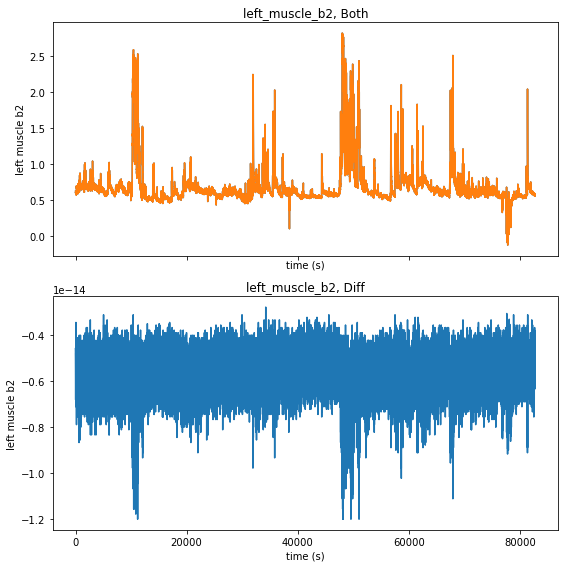

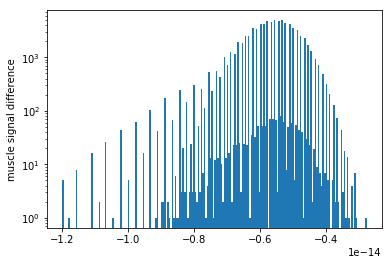

In [53]:
muscles = ['b1', 'b2', 'b3', 'i1', 'i2', 'iii1', 'iii24', 'iii3', 'hg1', 'hg2', 'hg3', 'hg4']
# sides = ['left', 'right']
sides = ['left', 'right']

muscle_ind = 1
side_ind = 0

my_dumb_comp(my_dict, thad_dict, '%s_muscle_%s' %(sides[side_ind], muscles[muscle_ind]))
ax_curr = plt.gca()
# ax_curr.set_xlim([942,944])plot_keys = side + '_' + muscle_keys

fig, ax = plt.subplots()
diff_key = '%s_muscle_%s'
muscle_diff = my_dict[diff_key % (sides[side_ind], muscles[muscle_ind])] - \
    thad_dict[diff_key % (sides[side_ind], muscles[muscle_ind])]
ax.hist(muscle_diff, bins=200) ;
ax.set_yscale('log')
ax.set_ylabel('muscle signal difference')

In [74]:
# quick function to plot muscles
def plot_muscle_grid(model_fits, side=None):
    fig, ax_list = plt.subplots(3,4, figsize=(12,6))
#     muscle_keys = ['b1', 'b2', 'b3', 'i1', 'i2', 'iii1', 'iii24', 'iii3', 'hg1', 'hg2', 'hg3', 'hg4']
    muscle_keys = sorted(['iii1', 'iii3', 'hg2', 'hg3', 'hg1', 'i1', 'b1', 'b2', 'b3', 'iii24', 'hg4'])
    
    # read from data dict
    plot_keys = [key for key in model_fits.keys() if any(mkey in key for mkey in muscle_keys)]
    try:
        time = np.squeeze(model_fits['time'])
    except KeyError:
        time = np.arange(model_fits[plot_keys[0]].size)
        
    # only retain one side, if given as input
    if side:
        plot_keys = [key for key in plot_keys if side in key]
    
    # sort?
    plot_keys.sort()
    # loop over keys and plot
    for (ith, key) in enumerate(plot_keys):
        plot_idx = np.unravel_index(ith, ax_list.shape)
        ax_list[plot_idx].plot(time, model_fits[key], label=key)
        ax_list[plot_idx].set_title(key.replace('_', ' '))

    plt.tight_layout()

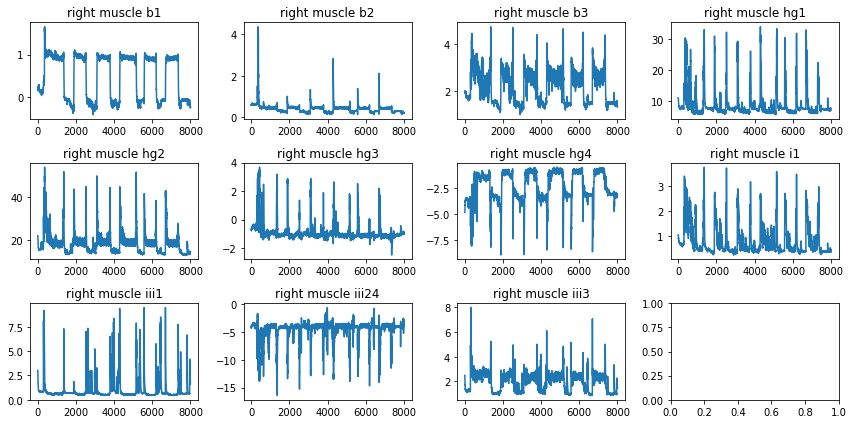

In [75]:
plot_muscle_grid(my_dict, side='right')

In [77]:
# temp -- check image timing
img_path = os.path.join(my_path, 'ca_cam_right.hdf5')
time_path = os.path.join(my_path, 'time.hdf5')
with h5py.File(img_path, 'r') as f:
    print(f.keys())

[u'time']


In [12]:
# Looks like my extraction was the problem, so going to check that out
my_left_b1 = my_dict['left_muscle_b1']
my_left_b2 = my_dict['left_muscle_b2']
my_right_b1 = my_dict['right_muscle_b1']
my_right_b2 = my_dict['right_muscle_b2']
time = np.squeeze(my_dict['time'])

fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(time, my_left_b1, label='left b1')
ax1.plot(time, my_right_b1, label='right b1')
ax1.legend()
ax1.set_xlabel('time (s)')

ax2.plot(time, my_left_b2, label='left b2')
ax2.plot(time, my_right_b2, label='right b2')
ax2.legend()
ax2.set_xlabel('time (s)')

plt.tight_layout()

KeyError: 'right_muscle_b1'

**Why is the right b1 muscle saved but not others???**

In [ ]:
# another dumb plot function!
def plot_muscle_grid(model_fits, side=None):
    fig, ax_list = plt.subplots(3,4, figsize=(10,6))
    exclude_keys = ['pr', 'tpd', 'nm', 'bkg', 't']
    if side:
        exclude_keys = [side + '_' + k for k in exclude_keys]
        time = np.squeeze(model_fits['%s_t' % (side)])
        plot_keys = [key for key in model_fits.keys() if not key in exclude_keys and side in key]
    else:
        time = np.squeeze(model_fits['t'])
        plot_keys = [key for key in model_fits.keys() if not key in exclude_keys]

    for (ith, key) in enumerate(plot_keys):
        plot_idx = np.unravel_index(ith, ax_list.shape)
        ax_list[plot_idx].plot(time, model_fits[key], label=key)
        ax_list[plot_idx].set_title(key.replace('_', ' '))

    plt.tight_layout()

In [ ]:
# did it get saved by muscle extraction code? (I'm guessing not, but good to check)
model_fits = dict()
model_fits_thad = dict()

# muscle signals need special treatment for thad unbagging
sides = ['right', 'left']
# new_key_str = '%s_muscle_%s'  # side, muscle name

# loop over left and right (in separate files)
for side in sides:
    # open pickled dictionary containing muscle data
    muscle_path_sam = os.path.join(root_path, my_folder, 'ca_camera_%s_model_fits.cpkl' % side)
    with open(muscle_path_sam,'rb') as f:
        muscle_data = cPickle.load(f)
        # pickled dict has keys corresponding to muscle names. to add to main dict, need to add some extra info
        for mkey in muscle_data:
            model_fits['%s_%s' %(side,mkey)] = muscle_data[mkey]
    
    # open pickled dictionary containing muscle data FROM THAD
    muscle_path_thad = os.path.join(root_path, thad_folder, 'ca_cam_%s_model_fits.cpkl' % side)
    with open(muscle_path_thad,'rb') as f:
        muscle_data = cPickle.load(f)
        # pickled dict has keys corresponding to muscle names. to add to main dict, need to add some extra info
        for mkey in muscle_data:
            model_fits_thad['%s_%s' %(side,mkey)] = muscle_data[mkey]
            
#     # plot!
#     plot_muscle_grid(model_fits)

**--> ended up needing to fix the way that the muscle signals time vector was being stored, but now seems better**
NB: a think to look out for in Python that's different from Matlab is that new arrays aren't necessarily created by "=". In python you'll often continue to reference the same object, so need to put '.copy()' or something

### Checking "raw" stored signals because, for some reason, right matches perfectly while left doesn't

In [ ]:
# try checking one muscle 
key_curr = 'left_b2'# did it get saved by muscle extraction code? (I'm guessing not, but good to check)
left_b2_thad = model_fits_thad[key_curr]
# left_t_thad = model_fits_thad['t']
left_b2_sam = model_fits[key_curr]
left_t_sam = model_fits['left_t']

fig, ax = plt.subplots()

ax.plot(left_t_sam - left_t_sam[0], left_b2_sam, label='sam')
ax.plot(thad_dict['time'], left_b2_thad, label='thad')
ax.legend()
ax.set_xlabel('time (s)')
ax.set_ylabel(key_curr.replace('_', ' '))

In [ ]:
# check time signals for the two cameras (I store this as 't' in model fits)
fig, (ax1, ax2) = plt.subplots(2)

# ax.plot(model_fits['left_t'],label='left')
# ax.plot(model_fits['right_t'],label='right')
ax1.plot(model_fits['left_t'] - model_fits['right_t'])
ax1.set_title('Left vs Right Ca Camera t stamp diff') ;
ax1.set_ylabel('time (s)') ;
ax1.set_xlabel('frame') ;

ax2.hist(model_fits['left_t'] - model_fits['right_t'], bins=200) ;
ax2.set_xlabel('time (s)') ;

plt.tight_layout()

print(np.mean(np.diff(model_fits['left_t'])))
print(np.mean(np.diff(model_fits['right_t'])))

**--> this tells us that there are real differences between the left and right Ca camera time stamps**
So only using the right Ca camera time stamps vs left _and_ right could produce different results. The question is why this is ha

### Note 9/19/2022
Last Friday, I was at a point where everything was matching between the data extracted from my code and Thad's code, **except** that the left wing muscle signals differed a bit (not huge, but still). The right wing muscle signals matched perfectly

Thad's unbagging code only makes use of the time stamps from the right Ca camera, so what I tried today is altering my code to do the same -- previously it used the left camera times stamps for the left muscle signals, and same for the right. When I fix everything to the clock of the Ca camera on the right side, I can get perfect agreement with Thad's code, so it seems like that is the difference.

The problem is, I think taking into account the left camera time stamps is more accurate, e.g. I feel like my version will produce more accurate analyses. But how to check this, especially when I'm inclined to trust Thad/Alysha? Maybe looking at individual frames (which are sampled at >50 Hz) from the left Ca camera and see how well they match up with the extracted signals? Or just run it by Francesca to see if this makes sense?

## Assuming for now my method is okay, look at extracted muscle signals

In [ ]:
sides = ['left', 'right']
for side in sides:
    print('Plots for %s side' %(side))
    plot_muscle_grid(model_fits, side=side)

In [ ]:
# look at left - right amplitude 
kernel_size = 10
kernel = np.ones(kernel_size) / kernel_size

fig, ax = plt.subplots()

LmR = my_dict['left_amp'] - my_dict['right_amp']
time = my_dict['time']
# smooth?
LmR_convolved = np.convolve(LmR, kernel, mode='same')

ax.plot(time, LmR)
ax.plot(time, LmR_convolved)


In [ ]:
fig, ax = plt.subplots()
time = my_dict['time']

ax.plot(time, my_dict['left_amp'], label='left')
ax.plot(time, my_dict['right_amp'], label='right')
ax.legend()

## NOTE: still need to check experiment messages